Goal is to plot solar irradiance over time, to match up with imaging data in a movie. SORCE data was retrieved from NASA's EOSDIS Earthdata site and the SORCE data site: http://lasp.colorado.edu/home/sorce/data/tsi-data/ (the latter does not require a login but the first one does)

In [1]:
import itertools, os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.io.ascii as at

# Using a dark background because these are intended to go over SDO and similar images
# which have a black background
plt.style.use('dark_background')

In [9]:
# ; ***DATA DEFINITIONS***, number = 15 [field name, type, format, (Col. #, description)]
# ; nominal_date_yyyymmdd                 R8   f12.3 (Column  1: Nominal Data Time, YYYYMMDD)
# ; nominal_date_jdn                      R8   f12.3 (Column  2: Nominal Data Time, Julian Day Number)
# ; avg_measurement_date_jdn              R8   f15.6 (Column  3: Average Data Time, Julian Day Number)
# ; std_dev_measurement_date              R4    f7.4 (Column  4: Stdev of Average Data Time, days, 1 sigma)
# ; tsi_1au                               R8   f10.4 (Column  5: Total Solar Irradiance (TSI) at 1-AU, W/m^2)
# ; instrument_accuracy_1au               R4   e10.3 (Column  6: Instrument Accuracy in 1-AU TSI, W/m^2, 1 sigma)
# ; instrument_precision_1au              R4   e10.3 (Column  7: Instrument Precision in TSI at 1-AU, W/m^2, 1 sigma)
# ; solar_standard_deviation_1au          R4   e10.3 (Column  8: Solar Standard Deviation in 1-AU TSI, W/m^2, 1 sigma)
# ; measurement_uncertainty_1au           R4   e10.3 (Column  9: Total Uncertainty in TSI at 1-AU, W/m^2, 1 sigma)
# ; tsi_true_earth                        R8   f10.4 (Column 10: Total Solar Irradiance at Earth distance, W/m^2)
# ; instrument_accuracy_true_earth        R4   e10.3 (Column 11: Instrument Accuracy at Earth distance, W/m^2, 1 sigma)
# ; instrument_precision_true_earth       R4   e10.3 (Column 12: Instrument Precision at Earth distance, W/m^2, 1 sigma)
# ; solar_standard_deviation_true_earth   R4   e10.3 (Column 13: Solar Standard Deviation in TSI at Earth, W/m^2, 1 sigma)
# ; measurement_uncertainty_true_earth    R4   e10.3 (Column 14: Total Uncertainty in TSI at Earth distance, W/m^2, 1 sigma)
# ; provisional_flag                      I2      i2 (Column 15: Provisional Flag, 1=provisional data, 0=final data)
# ; ***END DATA DEFINITIONS***
colnames = ["nominal_date_yyyymmdd","nominal_date_jdn","avg_measurement_date_jdn",
            "std_dev_measurement_date","tsi_1au","instrument_accuracy_1au",
            "instrument_precision_1au","solar_standard_deviation_1au",
            "measurement_uncertainty_1au","tsi_true_earth","instrument_accuracy_true_earth",
            "instrument_precision_true_earth","solar_standard_deviation_true_earth",
            "measurement_uncertainty_true_earth","provisional_flag"]

In [28]:
dat = at.read("SORCE_TSI_6hr.dat",comment=";",names=colnames)

In [29]:
dat.dtype

dtype([('nominal_date_yyyymmdd', '<f8'), ('nominal_date_jdn', '<f8'), ('avg_measurement_date_jdn', '<f8'), ('std_dev_measurement_date', '<f8'), ('tsi_1au', '<f8'), ('instrument_accuracy_1au', '<f8'), ('instrument_precision_1au', '<f8'), ('solar_standard_deviation_1au', '<f8'), ('measurement_uncertainty_1au', '<f8'), ('tsi_true_earth', '<f8'), ('instrument_accuracy_true_earth', '<f8'), ('instrument_precision_true_earth', '<f8'), ('solar_standard_deviation_true_earth', '<f8'), ('measurement_uncertainty_true_earth', '<f8'), ('provisional_flag', '<i8')])

In [52]:
mov = (dat["nominal_date_yyyymmdd"]>=20111101) & (dat["nominal_date_yyyymmdd"]<=20111201)
print(np.where(mov))

(array([12684, 12685, 12686, 12687, 12688, 12689, 12690, 12691, 12692,
       12693, 12694, 12695, 12696, 12697, 12698, 12699, 12700, 12701,
       12702, 12703, 12704, 12705, 12706, 12707, 12708, 12709, 12710,
       12711, 12712, 12713, 12714, 12715, 12716, 12717, 12718, 12719,
       12720, 12721, 12722, 12723, 12724, 12725, 12726, 12727, 12728,
       12729, 12730, 12731, 12732, 12733, 12734, 12735, 12736, 12737,
       12738, 12739, 12740, 12741, 12742, 12743, 12744, 12745, 12746,
       12747, 12748, 12749, 12750, 12751, 12752, 12753, 12754, 12755,
       12756, 12757, 12758, 12759, 12760, 12761, 12762, 12763, 12764,
       12765, 12766, 12767, 12768, 12769, 12770, 12771, 12772, 12773,
       12774, 12775, 12776, 12777, 12778, 12779, 12780, 12781, 12782,
       12783, 12784, 12785, 12786, 12787, 12788, 12789, 12790, 12791,
       12792, 12793, 12794, 12795, 12796, 12797, 12798, 12799, 12800,
       12801, 12802, 12803]),)


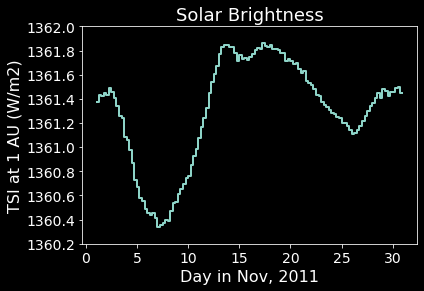

In [53]:
plt.step(dat["nominal_date_yyyymmdd"][mov]-20111100,dat["tsi_1au"][mov],lw=2,where="mid")
plt.xlabel("Day in Nov, 2011",fontsize=16)
plt.ylabel("TSI at 1 AU (W/m2)",fontsize=16)
plt.title("Solar Brightness",fontsize=18)

ax = plt.gca()
ax.tick_params(labelsize=14)
ax.set_yticks(np.linspace(1360.2,1362,10))

plt.savefig("sunspot_transit_nov2011.png",bbox_inches="tight",dpi=300,facecolor="w")

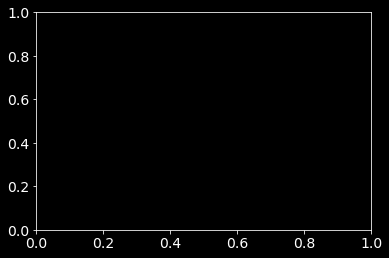

In [57]:
plt.figure()

movi = np.where(mov)[0]
i0 = movi[0]
for i in movi:
    ax = plt.gca()
    ax.tick_params(labelsize=14)
    ax.set_ylim(1360.2,1362)
    ax.set_yticks(np.linspace(1360.2,1362,10))
    ax.set_xlim(0,31)

    ax.set_xlabel("Day in Nov, 2011",fontsize=16)
    ax.set_ylabel("Irradiance (W/m2)",fontsize=16)
    
    ax.step(dat["nominal_date_yyyymmdd"][i0:i+1]-20111100,dat["tsi_1au"][i0:i+1],lw=2,where="mid",color="#fdb462")

    ax.text(1,1361.9,f"{dat['nominal_date_yyyymmdd'][i]:.2f}")
    
    plt.savefig(f"frames/sunspot_transit_nov2011_{i}.png",bbox_inches="tight",dpi=300)

    ax.cla()
